In [72]:
%run network_functions.ipynb

# Line Graphs

In [73]:
def line_graph(n, view=False):
    '''Returns graph and adjacency matrix of a <<line>> graph: 
       i -- i + 1 for i = 1 ... n - 1                                                  
    '''
    g = nx.Graph()
    for i in range(1, n - 1):
        g.add_edge(i, i + 1)
    if view:
        nx.draw(g, pos=nx.circular_layout(g), with_labels=True, 
                            node_color='r', edge_color='black')
    return g, get_communication_matrix(g)

In [74]:
def ATA(N, graph_type, *args, **kwargs):
    _, A = graph_type(N, *args, **kwargs)
    return np.dot(A.T, A)

In [75]:
36 * ATA(6, line_graph)

matrix([[13., 13.,  4.,  0.,  0.],
        [13., 17.,  8.,  4.,  0.],
        [ 4.,  8., 12.,  8.,  4.],
        [ 0.,  4.,  8., 17., 13.],
        [ 0.,  0.,  4., 13., 13.]])

In [76]:
print(np.round(36 * ATA(6, line_graph), 1))

[[13. 13.  4.  0.  0.]
 [13. 17.  8.  4.  0.]
 [ 4.  8. 12.  8.  4.]
 [ 0.  4.  8. 17. 13.]
 [ 0.  0.  4. 13. 13.]]


In [77]:
first = []
second = []
NS = list(range(10, 300))
for N in NS:
    M = ATA(N, line_graph)
    values = np.linalg.eigvalsh(M)
    first.append(values[-1])
    second.append(values[-2])

In [78]:
print(plt.style.available)

['seaborn-colorblind', '_classic_test', 'Solarize_Light2', 'seaborn-poster', 'seaborn-white', 'bmh', 'seaborn-ticks', 'seaborn-bright', 'seaborn-notebook', 'seaborn-darkgrid', 'seaborn-pastel', 'seaborn-dark-palette', 'seaborn-muted', 'grayscale', 'fast', 'classic', 'seaborn-deep', 'seaborn-paper', 'dark_background', 'seaborn', 'tableau-colorblind10', 'seaborn-talk', 'seaborn-dark', 'ggplot', 'fivethirtyeight', 'seaborn-whitegrid']


In [88]:
def calculate_eigenvalues(rng, graph_type, *args, **kwargs):
    first = []
    second = []
    NS = list(range(rng[0], rng[1]))
    for N in NS:
        M = ATA(N, graph_type, *args, **kwargs)
        values = np.linalg.eigvalsh(M)
        first.append(values[-1])
        second.append(values[-2])
    return NS, first, second

In [137]:
def plot_two_eigenvalues(graph_type, rng=(5, 100), *args, **kwargs):
    
    #plt.style.use('seaborn-poster')
    plt.style.use('fivethirtyeight')
    NS, first, second = calculate_eigenvalues(rng, graph_type, *args, **kwargs)
        
    f, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))
    plt.subplots_adjust(hspace=0.3)
    
    ax1.scatter(NS, first, label='MaxEigenValue',alpha=0.5, marker='v', c='C0', edgecolors='face')
    ax1.scatter(NS, second, label='SecondMaxEigenValue',alpha=0.5, marker='^', c='C1', edgecolors='face')
    ax1.legend(loc=0)
    ax1.set_title('Two $A^TA$ eigenvalues w.r.t. matrix size')
    ax1.set_xlabel('Matrix Size')
    
    ax2.hist(first, alpha=0.5, label='MaxEigVals')
    ax2.hist(second, alpha=0.5, label='SecondMaxEigVals')
    ax2.set_title('Eigenvalues frequencies')
    ax2.set_xlim(0.75, 1.25)
    ax2.legend(loc=0)
    
    #plt.tight_layout()
    plt.show()


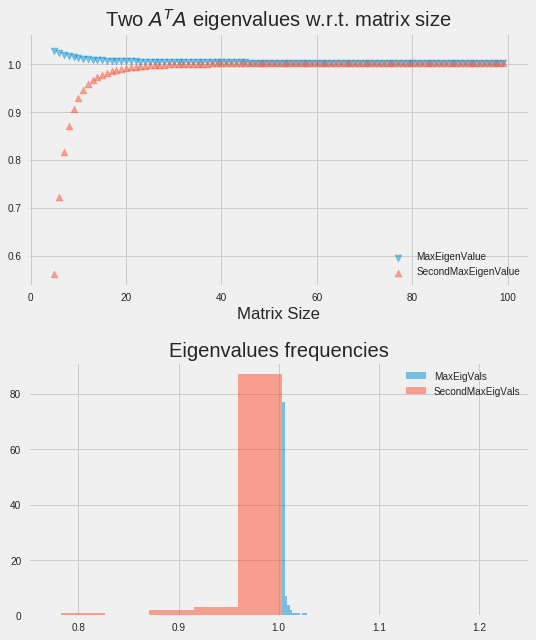

In [138]:
plot_two_eigenvalues(line_graph)

# Графы-Лесенки

In [127]:
def ladder_graph(n, view=False):
    '''Returns graph and adjacency matrix of a <<ladder>> graph: 
       i -- i + 1 for i = 1 ... n - 1
       i -- i + n for i = 1 ... n                                                    
    '''
    g = nx.Graph()
    for i in range(1, n):
        g.add_edge(i, i + 1)
        g.add_edge(i + n, i + n + 1)
        g.add_edge(i, i + n)
    g.add_edge(n, 2*n)
    if view:
        nx.draw(g, pos=nx.circular_layout(g), with_labels=True, 
                            node_color='r', edge_color='black')
    return g, get_communication_matrix(g)

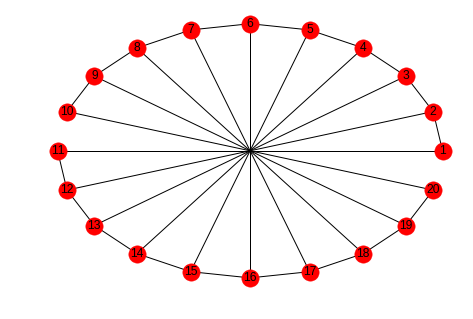

In [130]:
_, _ = ladder_graph(10, view=True)

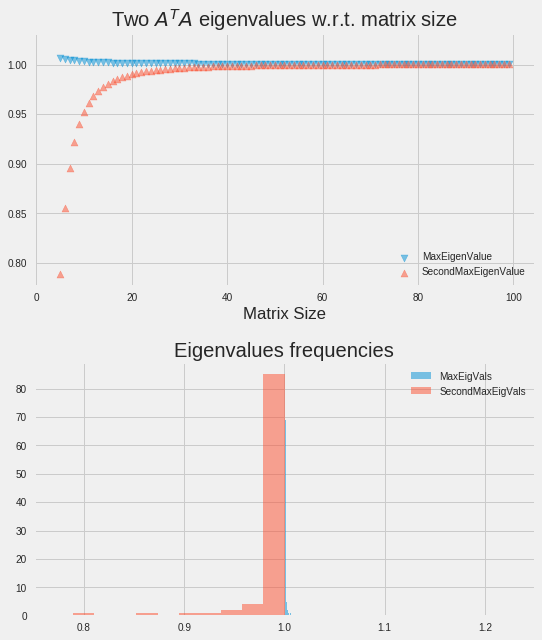

In [139]:
plot_two_eigenvalues(ladder_graph)

# Графы "Тесный Мир"

У них я соединяю всех соседей (цикл), вершины через одну и вершины по модулю $N \cdot \alpha$.
Ниже выводятся графики для графов с различными $\alpha$

In [126]:
def small_world_graph(n, alpha=0.5, view=False):
    '''Returns graph and adjacency matrix of a <<small world>> graph:                                                       
    '''
    g = nx.Graph()
    for i in range(n):
        g.add_edge(i, (i + 1) % n)
        g.add_edge(i, (i + 2) % n)
        
    
    lr_idx = list(range(0, n, max(1, int(n*alpha))))
    lr_len = len(lr_idx)
    
   # print(lr_idx)
    for i in range(lr_len):
        g.add_edge(lr_idx[i], lr_idx[(i + 1) % lr_len])
        
    if view:
        plt.figure(figsize=(5,5))
        nx.draw(g, pos=nx.circular_layout(g), with_labels=True, 
                            node_color='r', edge_color='black')
    return g, get_communication_matrix(g)

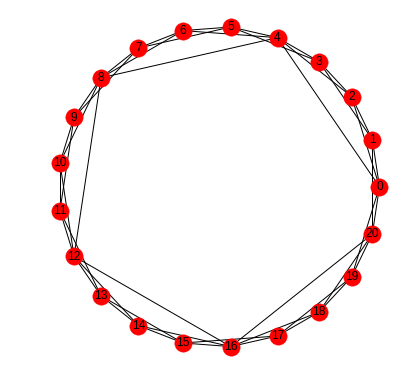

In [125]:
_, _ =small_world_graph(21, alpha=0.2, view=True)

alpha: 0.1


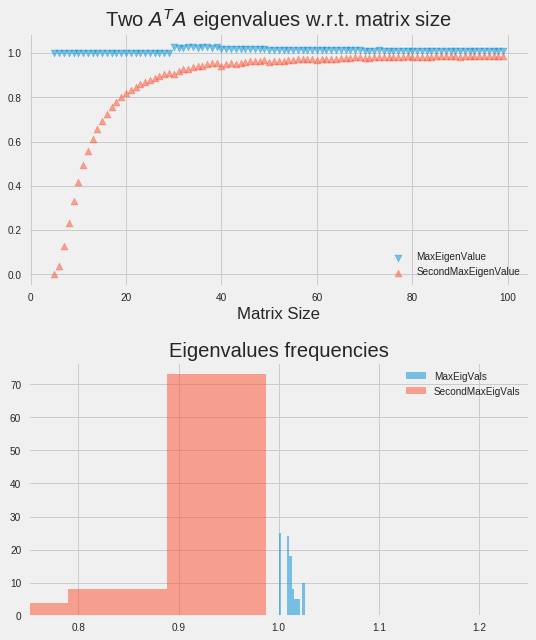

alpha: 0.2


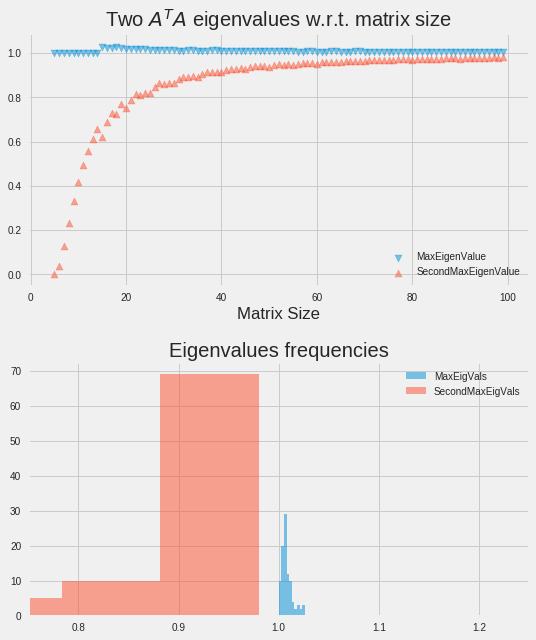

alpha: 0.3


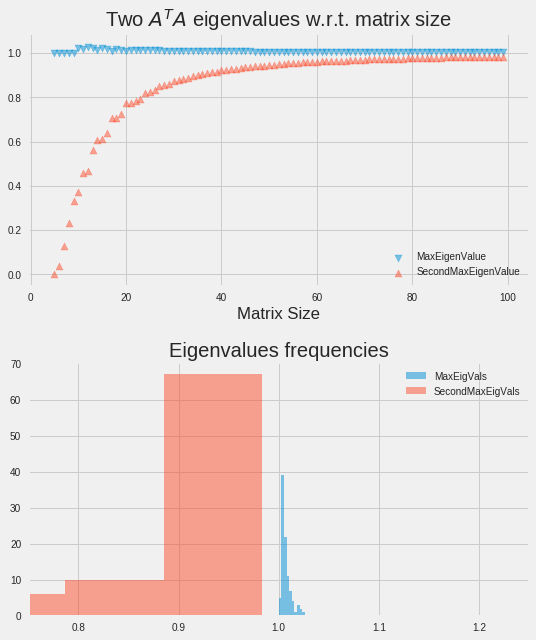

alpha: 0.4


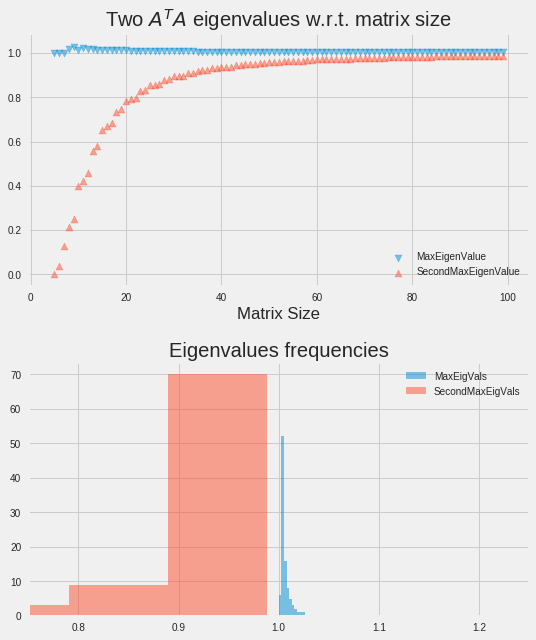

alpha: 0.5


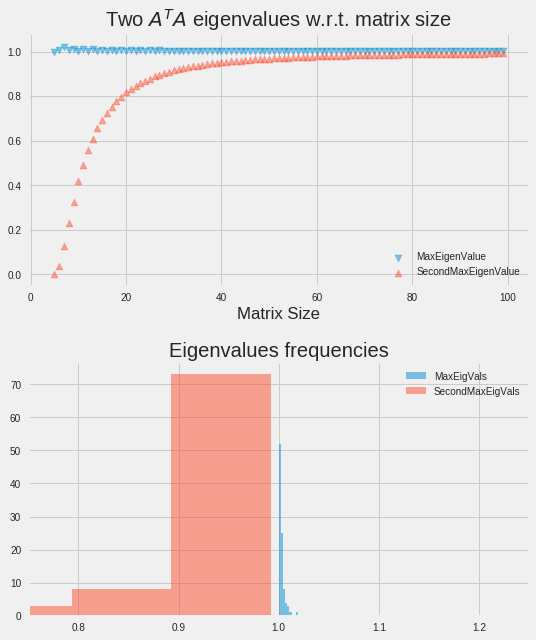

alpha: 0.6


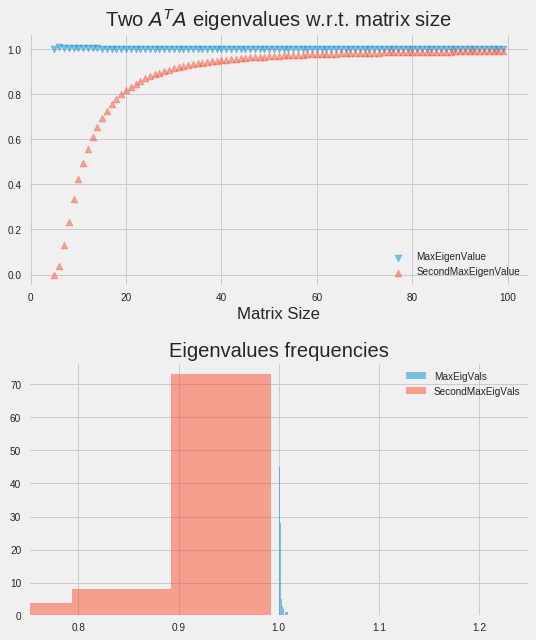

alpha: 0.7


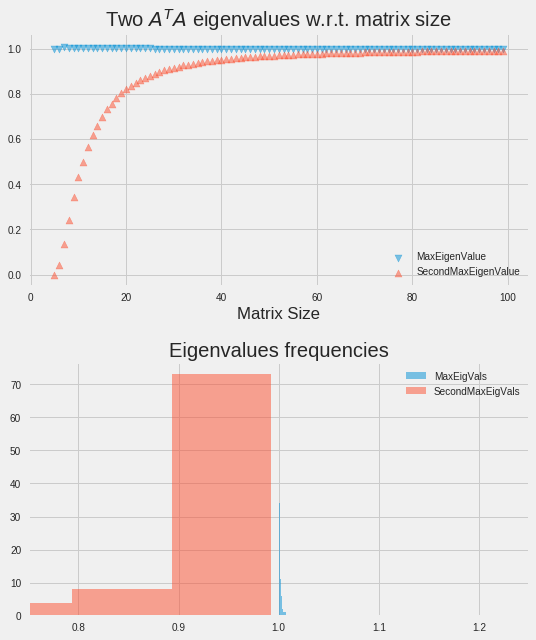

alpha: 0.8


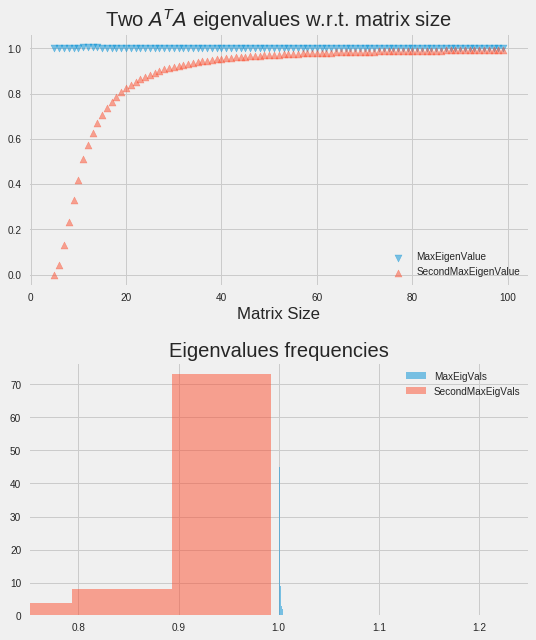

In [140]:
for alpha in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]:
    print('alpha:', alpha)
    plot_two_eigenvalues(small_world_graph, alpha=alpha)